### Descargar Información

Use the following cells to download the data.

In [1]:
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [2]:
#!unzip concrete_data_week4.zip

<a id="item42"></a>

## Librerias

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

#from tensorflow.python.keras.applications import vgg16
#from keras.applications.vgg16 import VGG16

#tensorflow.keras.applications.vgg16.VGG16()

### Detección de GPU

In [6]:
#Check Process
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8783135301905587359
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3059430195
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11048661149180767764
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


### Tamano de imagen y params de CNN

In [7]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

### Imagenes en carpetas y variables de entrenamiento

In [8]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [9]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [10]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [11]:
model = tf.keras.Sequential()

### Capas del modelo

In [12]:
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [13]:
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.layers

In [15]:
model.layers[0].layers

In [16]:
model.layers[0].trainable = False

### Resumen del modelo

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

### Deteccion de GPU por Tensorflow

In [20]:
import tensorflow as tf
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [21]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7126769180844047690
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3059430195
locality {
  bus_id: 1
  links {
  }
}
incarnation: 644146098693928339
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [22]:
#4 Hrs CPU , 15 - 30 min GPU
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 301 steps, validate for 96 steps
Epoch 1/2
301/301 [==============================] - 331s 1s/step - loss: 0.1612 - accuracy: 0.9452 - val_loss: 0.0298 - val_accuracy: 0.9929
Epoch 2/2
301/301 [==============================] - 323s 1s/step - loss: 0.0225 - accuracy: 0.9950 - val_loss: 0.0166 - val_accuracy: 0.9962


### Rendimieto Modelo

In [23]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


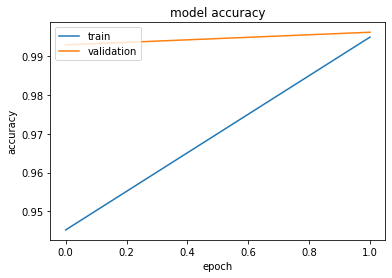

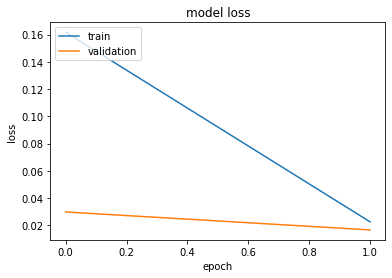

In [24]:
import matplotlib.pyplot as plt

plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Salvar Modelo y Evaluación

In [25]:
#model.save('classifier_vgg16_model2.h5')

In [26]:
loss, acc = model.evaluate(validation_generator, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

  ...
    to  
  ['...']
96/96 - 78s - loss: 0.0166 - accuracy: 0.9962
Untrained model, accuracy: 99.62%


In [27]:
import json

model_json = model.to_json()
with open("json_vgg16.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("model_vgg16.h5")

In [28]:
#Load Weights
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import json

with open('json_vgg16.json','r') as f:
    model_json = json.load(f)

model_vgg16 = model_from_json(model_json)
model_vgg16.load_weights('model_vgg16.h5')

In [29]:
#Compile Once again
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Reevaluate model VGG16
loss, acc = model_vgg16.evaluate(validation_generator, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

  ...
    to  
  ['...']
96/96 - 78s - loss: 0.0166 - accuracy: 0.9962
Untrained model, accuracy: 99.62%


### Modelo ResNet50 , Se ha salvado el modelo anterior

<a id="item43"></a>

In [31]:
from keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from tensorflow.python.keras.layers import Input, Dense

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

In [57]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_test = 100

In [42]:
#Same as in vgg16
#data_generator = ImageDataGenerator(
#    preprocessing_function=preprocess_input,
#)

In [46]:
#Shuffle Param = False

#train_generator = data_generator.flow_from_directory(
    #'concrete_data_week4/train',
    #target_size=(image_resize, image_resize),
    #batch_size=batch_size_training,
    #class_mode='categorical', shuffle=False)

Found 30001 images belonging to 2 classes.


In [33]:
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_test,
    class_mode='categorical', shuffle=False)

Found 500 images belonging to 2 classes.


In [34]:
model_resnet50 = tf.keras.Sequential()

In [35]:
model_resnet50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [36]:
model_resnet50.add(Dense(num_classes, activation='softmax'))

In [37]:
model_resnet50.layers

In [38]:
model_resnet50.layers[0].trainable = False

In [39]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [40]:
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
#Train vgg16 , test resnet50
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(test_generator)
num_epochs = 2

In [42]:
#Training
#Train Generator vgg16, resnet50 test
fit_history_resnet50 = model_resnet50.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=steps_per_epoch_validation, #Same in prediction
    verbose=1,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 301 steps, validate for 5 steps
Epoch 1/2
301/301 [==============================] - 198s 656ms/step - loss: 0.0379 - accuracy: 0.9888 - val_loss: 0.2306 - val_accuracy: 0.9020
Epoch 2/2
301/301 [==============================] - 189s 628ms/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.1245 - val_accuracy: 0.9500


In [43]:
# list all data in history, ResNet50
print(fit_history_resnet50.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


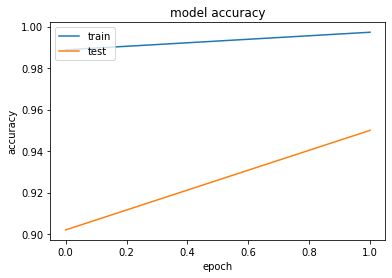

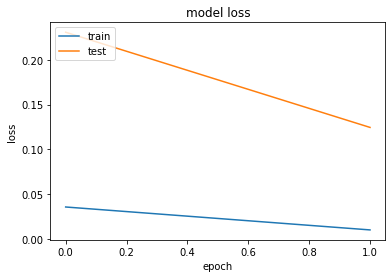

In [44]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(fit_history_resnet50.history['accuracy'])
plt.plot(fit_history_resnet50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_history_resnet50.history['loss'])
plt.plot(fit_history_resnet50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:

loss, acc = model_resnet50.evaluate(test_generator, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

  ...
    to  
  ['...']
5/5 - 3s - loss: 0.1245 - accuracy: 0.9500
Untrained model, accuracy: 95.00%


In [60]:

import json

model_json_resnet50 = model_resnet50.to_json()
with open("json_ResNet50.json", "w") as json_file:
    json.dump(model_json_resnet50, json_file)

model_resnet50.save_weights("model_resnet50.h5")

In [62]:
#Load Weights
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import json

with open('json_ResNet50.json','r') as f:
    model_json_resnet50 = json.load(f)

model_resnet50 = model_from_json(model_json)
model_resnet50.load_weights('model_resnet50.h5')

In [63]:

model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:

loss, acc = model_resnet50.evaluate(validation_generator, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

  ...
    to  
  ['...']
5/5 - 5s - loss: 0.1847 - accuracy: 0.9360
Untrained model, accuracy: 93.60%


### Clasificación Final de Imágenes

<a id="item44"></a>

In [55]:
#predict_generator(generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
#From train_generator

#Reset Generator
test_generator.reset()

In [61]:
#predict_generator(generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
pred = model.predict_generator(test_generator)

In [62]:
#500 Items in Test
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

# I DID KNOW how to shuffle or separate both FOLDERS (positive and negative), it seems it classify each folder pretty well
#Or how to identify the first 5 images

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,